In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1385,1386,50,RM,40.0,5436,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125500
701,702,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,COD,Normal,140000
1399,1400,50,RL,51.0,6171,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,137450


In [173]:
def drop_low_colums(df):
    data_corr=df.corr()
    d_list=data_corr[data_corr.SalePrice<0.5].index.tolist()
    return d_list

data_train=data_train.drop(['YearBuilt','1stFlrSF'], axis=1)
data_test=data_test.drop(['YearBuilt','1stFlrSF'], axis=1)
data_drop_train=data_train.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)
data_drop_test=data_test.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)
drop_list=drop_low_colums(data_drop_train)
data_drop_train1=data_drop_train.drop(drop_list, axis=1)
data_drop_test1=data_drop_test.drop(drop_list, axis=1)

In [174]:
data_drop_train1=data_drop_train1.fillna('0')
data_drop_test1=data_drop_test1.fillna('0')

In [175]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = data_drop_train1.select_dtypes(include=object).columns
   
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        df_train[feature] = le.fit_transform(df_train[feature])
        df_test[feature] = le.fit_transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_drop_train1, data_drop_test1)

In [176]:
data_drop_train2=data_train.corr()
drop_list2=list(data_drop_train2.query('SalePrice<0.5').index)
data_drop_train2=data_train.drop(drop_list2, axis=1)
data_drop_test2=data_test.drop(drop_list2, axis=1)



In [177]:
def change_colums(colums):
    fz=np.ceil(np.log2(colums.max()))
    return fz

fz=change_colums(data_drop_train2.GarageArea)
data_drop_train2['GarageArea'] = pd.cut(data_drop_train2.GarageArea, fz)
fz=change_colums(data_drop_train2.GrLivArea)
data_drop_train2['GrLivArea'] = pd.cut(data_drop_train2.GrLivArea, fz)
fz=change_colums(data_drop_train2.TotalBsmtSF)
data_drop_train2['TotalBsmtSF'] = pd.cut(data_drop_train2.TotalBsmtSF, fz)
fz=change_colums(data_drop_train2.YearRemodAdd)
data_drop_train2['YearRemodAdd'] = pd.cut(data_drop_train2.YearRemodAdd, fz)

In [178]:
data_drop_test2["TotalBsmtSF"] = data_drop_test2["TotalBsmtSF"].astype("int64")
data_drop_test2["GarageArea"] = data_drop_test2["GarageArea"].astype("int64")
data_drop_test2["GrLivArea"] = data_drop_test2["GrLivArea"].astype("int64")
data_drop_test2["GarageCars"] = data_drop_test2["GarageCars"].astype("int64")
data_drop_test2.loc[data_drop_test2['YearRemodAdd'] == '0'] = int(data_drop_test2["YearRemodAdd"].mean())

F:\soft\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [179]:
fz=change_colums(data_drop_test2.YearRemodAdd)
data_drop_test2['YearRemodAdd'] = pd.cut(data_drop_test2.YearRemodAdd, fz)
fz=change_colums(data_drop_test2.TotalBsmtSF)
data_drop_test2['TotalBsmtSF'] = pd.cut(data_drop_test2.TotalBsmtSF,fz)
fz=change_colums(data_drop_test2.GarageArea)
data_drop_test2['GarageArea'] = pd.cut(data_drop_test2.GarageArea,fz)
fz=change_colums(data_drop_test2.GrLivArea)
data_drop_test2['GrLivArea'] = pd.cut(data_drop_test2.GrLivArea, fz)

In [180]:
def encode_features1(df_train, df_test):
    features = ['YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train1, data_test1 = encode_features1(data_drop_train2, data_drop_test2)

In [188]:
from sklearn.model_selection import train_test_split
X=data_train1[['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
y=data_train1['SalePrice']
#随机划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [189]:
# 1.决策树回归
from sklearn import tree
model_decision_tree_regression = tree.DecisionTreeRegressor()
 
# 2.线性回归
from sklearn.linear_model import LinearRegression
model_linear_regression = LinearRegression()
 
# 3.SVM回归
from sklearn import svm
model_svm = svm.SVR()
 
# 4.kNN回归
from sklearn import neighbors
model_k_neighbor = neighbors.KNeighborsRegressor()
 
# 5.随机森林回归
from sklearn import ensemble
model_random_forest_regressor = ensemble.RandomForestRegressor(n_estimators=20)  # 使用20个决策树
 
# 6.Adaboost回归
from sklearn import ensemble
model_adaboost_regressor = ensemble.AdaBoostRegressor(n_estimators=50)  # 这里使用50个决策树
 
# 7.GBRT回归
from sklearn import ensemble
model_gradient_boosting_regressor = ensemble.GradientBoostingRegressor(n_estimators=100)  # 这里使用100个决策树
 
# 8.Bagging回归
from sklearn import ensemble
model_bagging_regressor = ensemble.BaggingRegressor()
 
# 9.ExtraTree极端随机数回归
from sklearn.tree import ExtraTreeRegressor
model_extra_tree_regressor = ExtraTreeRegressor()

In [190]:
def try_different_method(model, method):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    result = model.predict(X_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test, "go-", label="True value")
    plt.plot(np.arange(len(result)), result, "ro-", label="Predict value")
    plt.title(f"method:{method}---score:{score}")
    plt.legend(loc="best")



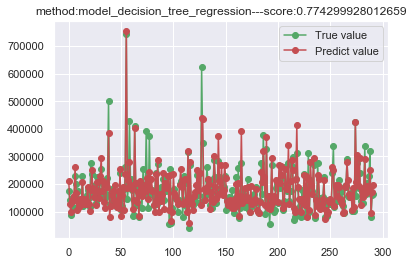

In [191]:
try_different_method(model_decision_tree_regression,"model_decision_tree_regression")

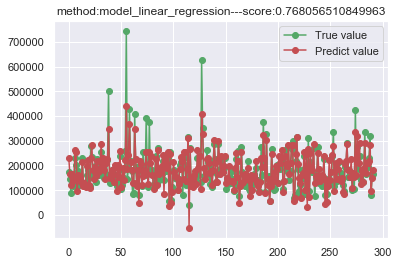

In [192]:
try_different_method(model_linear_regression,"model_linear_regression")

F:\soft\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


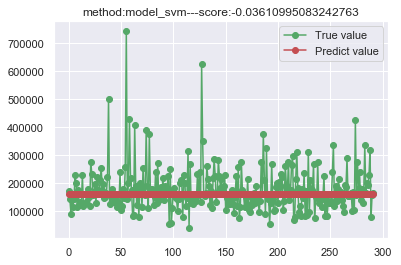

In [193]:
try_different_method(model_svm,"model_svm")

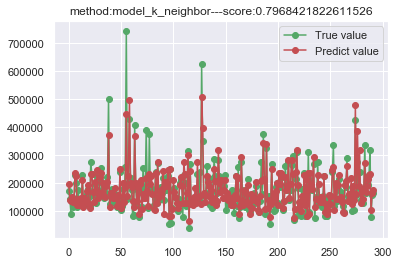

In [194]:
try_different_method(model_k_neighbor,"model_k_neighbor")

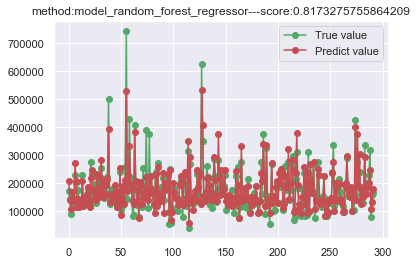

In [195]:
try_different_method(model_random_forest_regressor,"model_random_forest_regressor")

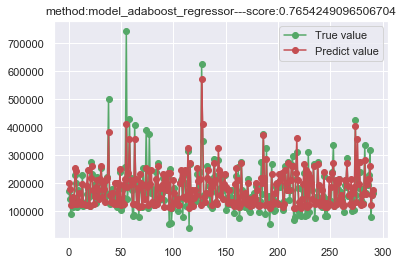

In [196]:
try_different_method(model_adaboost_regressor,"model_adaboost_regressor")

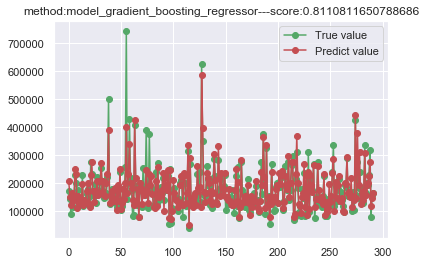

In [197]:
try_different_method(model_gradient_boosting_regressor,"model_gradient_boosting_regressor")

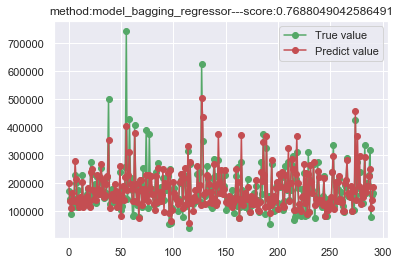

In [198]:
try_different_method(model_bagging_regressor,"model_bagging_regressor")

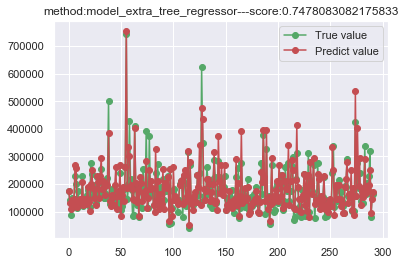

In [199]:
try_different_method(model_extra_tree_regressor,"model_extra_tree_regressor")

In [200]:
model_gradient_boosting_regressor.fit(X_train, y_train)
model_gradient_boosting_regressor_result = model_gradient_boosting_regressor.predict(data_test1)

In [201]:
submission=pd.DataFrame({'Id':data_test['Id'],'SalePrice':model_gradient_boosting_regressor_result})
submission.to_csv('submission.csv',index=False)

In [205]:
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal
